In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from os.path import join as pjoin
from scipy.spatial.distance import pdist
from sklearn import neighbors
from scipy.io import loadmat
from scipy.stats import zscore 
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA,KernelPCA
import umap

from matplotlib.gridspec import GridSpec

# import umap.plot

# sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


In [2]:
def var_expl(Z,Y):
    """
        Calculate proportion variance in Z explained by variance in Y
    """
    Z = Z - np.mean(Z,1)[:,np.newaxis]
    Y = Y - np.mean(Y,1)[:,np.newaxis]
    Z_2 = np.mean(np.linalg.norm(Z,2,axis = 1))**2
    Z_minus_Y_2 = np.mean(np.linalg.norm(Z - Y,2,axis = 1))**2
    return (Z_2 - Z_minus_Y_2) / Z_2
    

In [3]:
# Nice and hard-coded paths
data_path = '/Users/joshstern/Documents/UchidaLab_NeuralData/patch_foraging_neuropix/josh/manifolds/spud_code/data'
synth1d_dataset = pjoin(data_path,'1D_synth.mat')
synth2d_dataset = pjoin(data_path,'2D_synth.mat')
synth3d_dataset = pjoin(data_path,'3D_synth.mat')


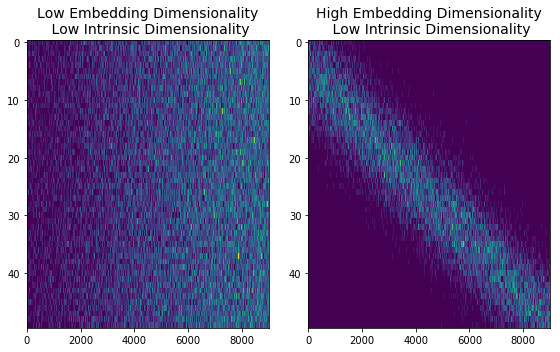

In [5]:
# Load synthetic data
synth1d = loadmat(synth1d_dataset)    
# Load the 1d intrinsic manifold data 
X_highEmbedding = synth1d['X_highEmbedding']
X_lowEmbedding = synth1d['X_lowEmbedding']
S = synth1d['S'] # .T.reshape((X_highEmbedding.shape[1] * X_highEmbedding.shape[2],1))

synth2d = loadmat(synth2d_dataset)
X_highEmbed_2d = synth2d['X_highEmbedding_2D']
S1 = synth2d['S1']
S2 = synth2d['S2']

synth3d = loadmat(synth3d_dataset)
X_highEmbed_3d = synth3d['X_highEmbedding_3D']
S1 = synth3d['S1']
S2 = synth3d['S2']
S3 = synth3d['S3']

# define variable to decode

# which data to use in form [n_cells n_timepoints]
X = X_highEmbedding.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))).T
# X_3d = X_highEmbedding
# X = X_3d.reshape((X_3d.shape[0],(X_3d.shape[1] * X_3d.shape[2]))).T

X = zscore(X)

visualization = True
if visualization == True:
    fig,ax = plt.subplots(1,2,figsize = (8,5))
#     ax[0].imshow(np.mean(X_lowEmbedding,axis = 2))
#     ax[1].imshow(np.mean(X_highEmbedding,axis = 2))
    ax[0].imshow(X_lowEmbedding.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))),aspect = 'auto')
    ax[1].imshow(X_highEmbedding.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))),aspect = 'auto')
    ax[0].set_title("Low Embedding Dimensionality\n Low Intrinsic Dimensionality",fontsize = 14)
    ax[1].set_title("High Embedding Dimensionality\n Low Intrinsic Dimensionality",fontsize = 14)
    
    fig.tight_layout()

In [6]:
# Now show UMAP vs PCA reconstructions
n_components = 2

# X_more = np.concatenate([X,X])
# S_more = np.concatenate([S,S])

# UMAP
umap_transformer = umap.UMAP(n_components = n_components,n_neighbors = 50,random_state=42)
X_transformed_umap = umap_transformer.fit_transform(X)
X_reconstr_umap = umap_transformer.inverse_transform(X_transformed_umap)
var_expl_umap2 = var_expl(X,X_reconstr_umap)

# pca
pca_transformer = PCA(n_components = n_components)
X_transformed_pca = pca_transformer.fit_transform(X)
X_reconstr_pca = pca_transformer.inverse_transform(X_transformed_pca)
var_expl_pca2 = var_expl(X,X_reconstr_pca)


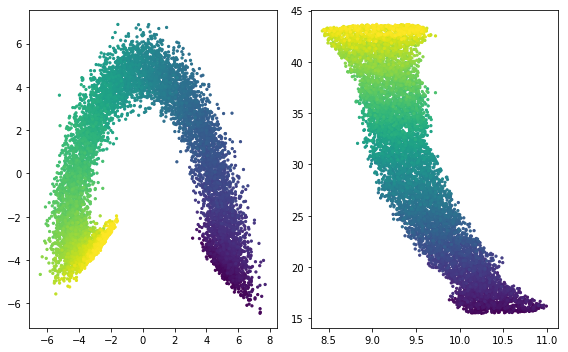

In [7]:
fig,ax = plt.subplots(1,2,figsize = (8,5))
ax[0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S.T.reshape(-1),s = 5)
ax[1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S.T.reshape(-1),s = 5)
fig.tight_layout()

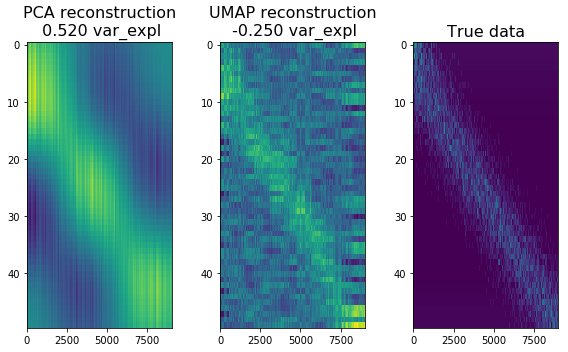

In [8]:
# For each, show what reconstruction looks like with 2 components
fig,ax = plt.subplots(1,3,figsize = (8,5))
ax[0].imshow(X_reconstr_pca.T,aspect = 'auto')
ax[0].set_title("PCA reconstruction\n %.3f var_expl"%var_expl_pca2,fontsize = 16)
ax[1].imshow(X_reconstr_umap.T,aspect = 'auto')
ax[1].set_title("UMAP reconstruction\n %.3f var_expl"%var_expl_umap2,fontsize = 16)
ax[2].imshow(X.T,aspect = 'auto')
ax[2].set_title("True data",fontsize = 16)
fig.tight_layout()

## MNIST positive control from UMAP website to check our inverse transform

In [10]:
# Positive control
data, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
umap_transformer = umap.UMAP(random_state=42)
umap_data = umap_transformer.fit_transform(data)
# umap.plot.points(mapper, labels=labels)


In [21]:
corners = np.array([
    [-5, -10],  # 1
    [-7, 6],  # 7
    [2, -8],  # 2
    [12, 4],  # 0
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

In [34]:
inv_transformed_points = umap_transformer.inverse_transform(umap_data[:100])


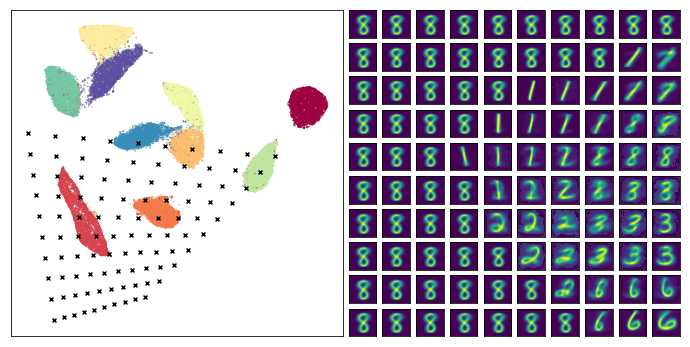

In [26]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
        digit_axes[i, j].set(xticks=[], yticks=[])

In [9]:
# ok this works!
# Let's try to do something a little more close to what we are doing? 
umap_transformer = umap.UMAP(random_state=42)
umap_transformer.fit(data)
umap_data = umap_transformer.transform(data[:100])
data_reconstr = umap_transformer.inverse_transform(umap_data)


NameError: name 'data' is not defined

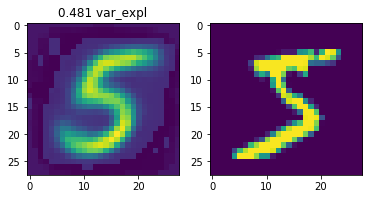

In [59]:
fig,ax = plt.subplots(1,2)
ax[1].imshow(data[0].reshape(28,28))
ax[0].set_title("%.3f var_expl"%var_expl(data[0].reshape(28,28),data_reconstr[0].reshape(28,28)))
ax[0].imshow(data_reconstr[0].reshape(28,28))


In [64]:
X_more = np.concatenate([X,X],axis = 0)
print(X_more.shape)

(1820, 50)


In [74]:
umap_transformer = umap.UMAP(random_state=42,n_neighbors = 50)
umap_transformer.fit(X_more)
X_transformed = umap_transformer.transform(X)
X_reconstr = umap_transformer.inverse_transform(X_transformed)


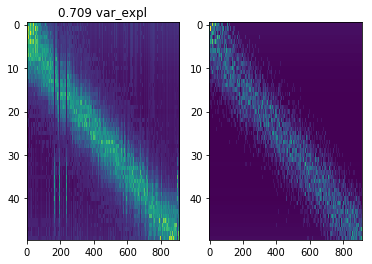

In [75]:
fig,ax = plt.subplots(1,2)
ax[1].imshow(X.T,aspect = 'auto')
ax[0].set_title("%.3f var_expl"%var_expl(X,X_reconstr))
ax[0].imshow(X_reconstr.T,aspect = 'auto')

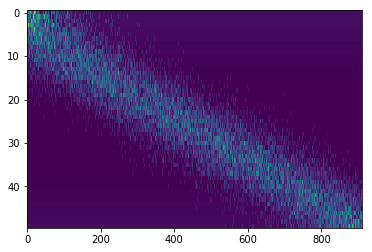

In [49]:
plt.imshow(X.T,aspect = 'auto')

In [76]:
X_more.shape

(1820, 50)